In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [88]:
fg=pd.read_csv('C:/Users/Heh/Desktop/CSV-1.csv')
fg=fg.drop(['unitNumber','latitude','longitude','livingArea','yearBuilt','lotSize','numParkingSpaces','stateOrProvince','fullStreetAddress','postalCode','listingDescription','listingTitle','geocodioAccuracyScore'],axis=1)
fg.head()

,id,city,country,bathrooms,bedrooms,listPrice,livingAreaUnit,lotSizeUnit,propertySubType,listingCategory,createdAt,photoscount,grade
0,2698139,St Peters,US,6,5,425000.0,squareFoot,squareFoot,Single Family Detached,Purchase,2019-02-21 14:53:27.462+00,29,awesome
1,2698093,St Louis,US,2,3,175000.0,squareFoot,squareFoot,Single Family Detached,Purchase,2019-02-21 14:53:07.92+00,29,awesome
2,2698007,Ballwin,US,3,3,295000.0,squareFoot,squareFoot,Condominium,Purchase,2019-02-21 14:52:30.126+00,29,awesome
3,2697963,Manchester,US,2,3,215000.0,squareFoot,squareFoot,Single Family Detached,Purchase,2019-02-21 14:52:11.85+00,29,awesome
4,2697938,O'fallon,US,4,4,375000.0,squareFoot,squareFoot,Single Family Detached,Purchase,2019-02-21 14:51:55.495+00,29,awesome


In [89]:
fg.isnull().sum()

id                 0
city               0
country            0
bathrooms          0
bedrooms           0
listPrice          0
livingAreaUnit     0
lotSizeUnit        0
propertySubType    0
listingCategory    0
createdAt          0
photoscount        0
grade              0
dtype: int64

In [117]:
fg['grade'].value_counts()

good       301
awesome    300
bad        299
Name: grade, dtype: int64

In [ ]:
#predicting grade
fg_new=fg.drop('grade',axis=1)
fg_new=pd.get_dummies(fg_new)
fg_new.head(1)

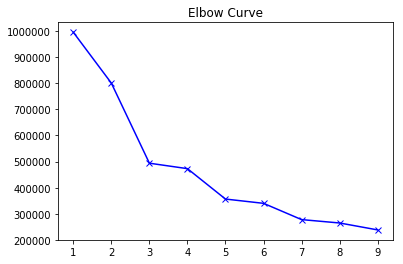

In [207]:
from scipy.spatial.distance import cdist
X=np.array(fg_new)
distortions=[]
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
    
plt.plot(K,distortions,'bx-')
plt.title('Elbow Curve')
plt.show()



#The curve would give us the optimal number of clusters.It is called the elbow curve.

In [206]:
df=fg_new
kmeans=KMeans(n_clusters=4) # means data will go in 4 clusters
kmeans.fit(df)
labels=kmeans.predict(df)
centroids=kmeans.cluster_centers_
print('labels : ',labels )
print('-----------------')


#This code tells us that there are more enteries in the 0th cluster.

labels :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

In [91]:
fgg=fg_new
fgg['grade']=fg['grade']
fgg.head(1)

,id,bathrooms,bedrooms,listPrice,photoscount,city_ANNAPOLIS,city_Abbeville,city_Acworth,city_Aiken,city_Akron,...,createdAt_2019-02-21 14:50:19.474+00,createdAt_2019-02-21 14:50:54.169+00,createdAt_2019-02-21 14:51:05.514+00,createdAt_2019-02-21 14:51:54.803+00,createdAt_2019-02-21 14:51:55.495+00,createdAt_2019-02-21 14:52:11.85+00,createdAt_2019-02-21 14:52:30.126+00,createdAt_2019-02-21 14:53:07.92+00,createdAt_2019-02-21 14:53:27.462+00,grade
0,2698139,6,5,425000.0,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,awesome


In [92]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(fgg,test_size=0.3,random_state=100)

In [93]:
train_x=train.drop('grade',axis=1)
train_y=train['grade']

test_x=test.drop('grade',axis=1)
test_y=test['grade']

In [215]:
# Clustering the data
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
l=[]
model_1aa=DecisionTreeClassifier(max_depth=2)
model_2aa=RandomForestClassifier(n_estimators=100)
model_3aa=KNeighborsClassifier(n_neighbors=5)
model_4aa=AdaBoostClassifier(n_estimators=100)
model_5aa=GaussianNB()
a=(model_1aa,model_2aa,model_3aa,model_4aa,model_5aa)
for i in a:
    i.fit(train_x,train_y)
    pred_test=i.predict(test_x)
    a=accuracy_score(test_y,pred_test)
    l.append(a*100)
df=(pd.DataFrame({'Accuracy':l},index=['Decision Tree','Random Forest','KNN','Ada Boost','Naive Bayes']).sort_values('Accuracy',ascending=False))
print(df)


#From the above code we can say that,RandomForest gives us the highest accuracy,meaning we can predict the grade of a  customer in the future,meaning we can suggest the customers the properties marked as awesome probably everytime as the accuracy of the predicted model is close to 95%.


                Accuracy
Random Forest  95.185185
Decision Tree  93.703704
Ada Boost      93.703704
KNN            71.111111
Naive Bayes    48.518519


In [105]:
kmeans = KMeans(n_clusters=4, random_state=100).fit(train_x,train_y)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)


In [106]:
pred_test=kmeans.predict(test_x)
pred_test

array([0, 2, 2, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 3, 3, 3, 0, 3, 2, 3, 2, 2, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 0, 0, 3, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       0, 2, 2, 3, 0, 3, 0, 3, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2, 3, 2, 2, 0,
       0, 3, 0, 0, 2, 3, 2, 0, 2, 0, 3, 3, 2, 0, 0, 0, 2, 0, 2, 2, 3, 3,
       0, 2, 3, 0, 0, 0, 2, 0, 2, 3, 3, 3, 0, 0, 2, 0, 3, 3, 0, 2, 0, 3,
       2, 3, 0, 0, 2, 2, 2, 3, 3, 3, 0, 0, 0, 0, 3, 3, 2, 0, 0, 3, 0, 3,
       0, 2, 3, 3, 3, 3, 0, 3, 0, 0, 0, 2, 0, 3, 0, 2, 2, 2, 3, 0, 0, 3,
       0, 3, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 3, 2, 0, 3, 3, 2, 0,
       3, 2, 0, 3, 2, 3, 0, 3, 3, 0, 3, 3, 2, 2, 3, 2, 3, 0, 3, 3, 3, 3,
       3, 3, 2, 0, 2, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 2,
       0, 3, 3, 0, 0, 0, 0, 2, 3, 0, 0, 3, 2, 2, 3, 2, 3, 0, 0, 3, 2, 2,
       3, 3, 3, 0, 3, 3])

In [107]:
accuracy_score(test_y,pred_test)

0.0

In [98]:
fg_new.head(1)

,id,bathrooms,bedrooms,listPrice,photoscount,city_ANNAPOLIS,city_Abbeville,city_Acworth,city_Aiken,city_Akron,...,createdAt_2019-02-21 14:50:19.474+00,createdAt_2019-02-21 14:50:54.169+00,createdAt_2019-02-21 14:51:05.514+00,createdAt_2019-02-21 14:51:54.803+00,createdAt_2019-02-21 14:51:55.495+00,createdAt_2019-02-21 14:52:11.85+00,createdAt_2019-02-21 14:52:30.126+00,createdAt_2019-02-21 14:53:07.92+00,createdAt_2019-02-21 14:53:27.462+00,grade
0,2698139,6,5,425000.0,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,awesome


In [103]:
K

range(1, 10)

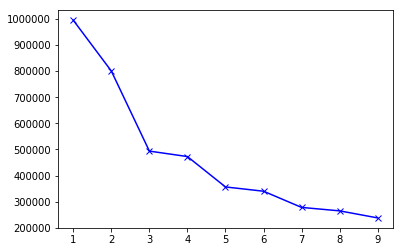

In [116]:
fg.head(1)

,id,city,country,bathrooms,bedrooms,listPrice,livingAreaUnit,lotSizeUnit,propertySubType,listingCategory,createdAt,photoscount,grade
0,2698139,St Peters,US,6,5,425000.0,squareFoot,squareFoot,Single Family Detached,Purchase,2019-02-21 14:53:27.462+00,29,awesome


# 1

In [139]:
import pandas as pd

In [ ]:
a=fg[fg.listingCategory=='Purchase']['city'].value_counts().head()

In [ ]:
a=pd.DataFrame(a)

In [ ]:
a.reset_index(level=0, inplace=True)

In [168]:
a['City']=a['index']
a['Count']=a['city']
a=a.drop(['index','city'],axis=1)
a

,City,Count
0,Las Vegas,19
1,Miami,18
2,Other City - In The State Of Florida,10
3,St Bernard,8
4,Pahrump,6


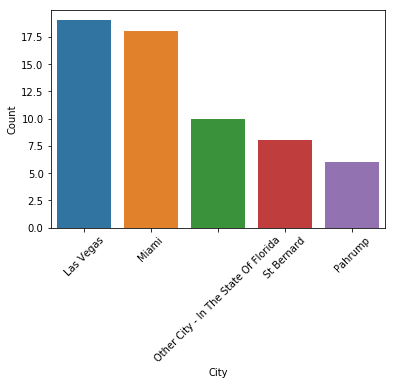

In [192]:
sns.barplot(x='City',y='Count',data=a,)
plt.xticks(rotation=45)
plt.show()

#top 5 cities having listingCategory as Purchase which means cities with maximum purchase. Which means the top 5 cities which have maximum purchase rate.

# 2

In [179]:
b=fg[fg.listingCategory=='Rent']['city'].value_counts().head()

In [180]:
b=pd.DataFrame(b)

In [181]:
b.reset_index(level=0, inplace=True)
b['City']=b['index']
b['Count']=b['city']
b=b.drop(['index','city'],axis=1)
b

,City,Count
0,Las Vegas,12
1,Miami,5
2,New York,5
3,Lucas,4
4,Brooklyn,4


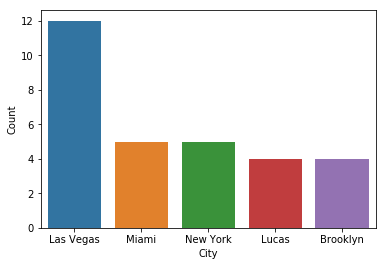

In [195]:
sns.barplot(x='City',y='Count',data=b)
plt.show()

#top 5 country having listingCategory as Rented. 

In [130]:
c=fg[fg.grade=='awesome'][['id','city']].head(5)
c

,id,city
0,2698139,St Peters
1,2698093,St Louis
2,2698007,Ballwin
3,2697963,Manchester
4,2697938,O'fallon


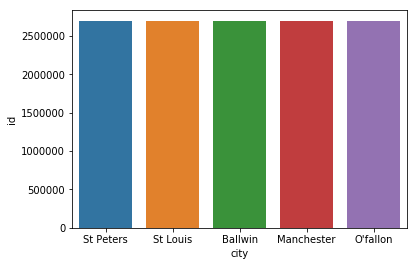

In [197]:
sns.barplot(x='city',y='id',data=c)
plt.show()

#This depicts the cities graded as Awesome by the customers wrt the property.

In [131]:
d=fg[fg.grade=='good'][['id','city']].head(5)
d

,id,city
106,2518922,Shirley
139,2385136,Brooklyn
142,2373303,CHANNAHON
143,2371048,Bayside
148,2356716,Statesboro


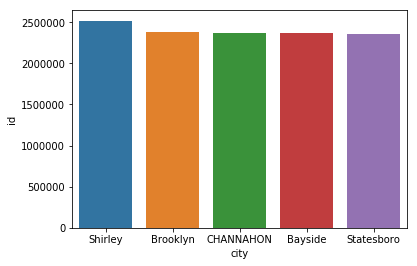

In [199]:
sns.barplot(x='city',y='id',data=d)
plt.show()


#This graph represents the cities which have been graded Good by the customers wrt the property.

In [133]:
e=fg[fg.grade=='bad'][['id','city']].tail(5)
e

,id,city
895,7114,Sunny Isles Beach
896,6599,Miami
897,5181,North Miami Beach
898,3983,Sunrise
899,2637,North Lauderdale


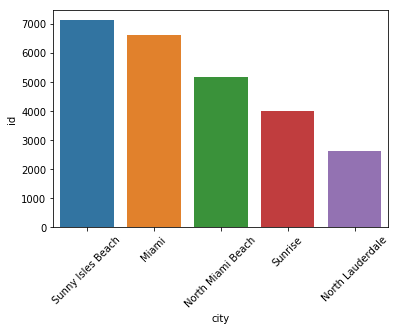

In [201]:
sns.barplot(x='city',y='id',data=e)
plt.xticks(rotation=45)
plt.show()


#This graph depicts the cities graded as Bad wrt the properties.

## I have used both KNN and K-Means clustering, I know that K-means clustering is unsupervised and works only with unlabelled data.But I have used it still.

# What kind of classifications would help a real estate platform like Nobbas.

# Answer. According the ML models,irrespective of data,RandomForest would be the best fit for classification puposes.But in this case,I've used KNN for classification. For both RandomForest and KNN,it is achievable.